In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify/spotify.xlsx


In [36]:
df = pd.read_excel('/kaggle/input/spotify/spotify.xlsx')

In [37]:
df.head()

,song_id,artists,name,acousticness,danceability,duration_ms,energy,instrumentalness,loudness,popularity,tempo,valence
0,5C1TucCRf4Vjjree1OItyv,['Lewis Capaldi'],One,0.83400,0.708,179908,0.339,0.000000,-7.085,72,117.995,0.5120
1,2mGpfyZuvwQT7qimhly4S1,['Momento'],The Destination,0.94000,0.115,247500,0.109,0.951000,-23.219,67,76.163,0.0391
2,59tskctgqUmjCWAwhzYAFm,['Sabrina Carpenter'],Looking at Me,0.00398,0.681,181120,0.798,0.000005,-4.367,71,105.990,0.5160
3,5Id5B3dxJZhPcV9GzgYZZe,"['Rich Music LTD', 'Sech', 'Dalex', 'Justin Qu...",Quizas,0.02580,0.727,216067,0.815,0.000000,-2.454,81,176.075,0.6770
4,4rWC4tiO4NCwRHdh6vyu6b,['Juice WRLD'],Big,0.06280,0.768,224063,0.641,0.000000,-6.197,65,144.963,0.2310


In [38]:
df.shape

(3756, 12)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3756 entries, 0 to 3755
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_id           3756 non-null   object 
 1   artists           3756 non-null   object 
 2   name              3756 non-null   object 
 3   acousticness      3756 non-null   float64
 4   danceability      3756 non-null   float64
 5   duration_ms       3756 non-null   int64  
 6   energy            3756 non-null   float64
 7   instrumentalness  3756 non-null   float64
 8   loudness          3756 non-null   float64
 9   popularity        3756 non-null   int64  
 10  tempo             3756 non-null   float64
 11  valence           3756 non-null   float64
dtypes: float64(7), int64(2), object(3)
memory usage: 352.2+ KB


1.		acousticness	(Ranges from 0 to 1). A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
2.		artists	Track Artists
3.		danceability	(Ranges from 0 to 1). Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
4.		duration_ms	The duration of the track in milliseconds. (Integer typically ranging from 200k to 300k)
5.		energy	Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.
6.		song_id	The Spotify ID for the track.
7.		instrumentalness	Predicts whether a track contains no vocals. Ranges from 0.0 to 1.0. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
8.		loudness	The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Values typical range between -60 and 0 db. 
9.		name	Track name
10.		popularity	The popularity of the song lately, default country = US. Higher score indicates higher popularity
11.		tempo	The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
12.		valence	A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). (Ranges from 0 to 1)



In [40]:
df.isnull().sum()

song_id             0
artists             0
name                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
loudness            0
popularity          0
tempo               0
valence             0
dtype: int64

In [41]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,loudness,popularity,tempo,valence
count,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000
mean,0.269698,0.657709,197443.986422,0.594279,0.059002,-7.650091,66.595847,119.971760,0.473756
std,0.282350,0.178534,50777.584692,0.203838,0.213182,5.330739,15.654377,31.031675,0.230290
min,0.000002,0.000000,32679.000000,0.000020,0.000000,-47.452000,0.000000,0.000000,0.000000
25%,0.047100,0.561000,168750.750000,0.493000,0.000000,-8.165750,64.000000,95.082500,0.305000
50%,0.163000,0.685000,193597.000000,0.621000,0.000000,-6.350000,68.000000,120.004500,0.474000
75%,0.406000,0.786000,219589.250000,0.732000,0.000052,-4.934250,73.000000,142.037500,0.647000
max,0.996000,0.978000,764457.000000,1.000000,0.992000,0.457000,100.000000,210.164000,0.979000


In [42]:
df.columns

Index(['song_id', 'artists', 'name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'loudness', 'popularity',
       'tempo', 'valence'],
      dtype='object')

In [43]:
# Including parameters represnting players performance excluding No of Hundreds
selected_columns_df = df[['acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'loudness', 'popularity',
       'tempo', 'valence']]

In [44]:
selected_columns_df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,loudness,popularity,tempo,valence
0,0.83400,0.708,179908,0.339,0.000000,-7.085,72,117.995,0.5120
1,0.94000,0.115,247500,0.109,0.951000,-23.219,67,76.163,0.0391
2,0.00398,0.681,181120,0.798,0.000005,-4.367,71,105.990,0.5160
3,0.02580,0.727,216067,0.815,0.000000,-2.454,81,176.075,0.6770
4,0.06280,0.768,224063,0.641,0.000000,-6.197,65,144.963,0.2310


In [45]:
from sklearn import preprocessing
#Scale the data to suppress the effect of variables with higher scale / variables in different units
scaler = preprocessing.StandardScaler().fit(selected_columns_df)
scaled_df = pd.DataFrame(scaler.fit_transform(selected_columns_df),columns=selected_columns_df.columns, index=selected_columns_df.index)

In [46]:
scaled_df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,loudness,popularity,tempo,valence
0,1.998856,0.281727,-0.345395,-1.252529,-0.276805,0.106020,0.345263,-0.063710,0.166089
1,2.374326,-3.040214,0.985921,-2.381025,4.184774,-2.920980,0.025821,-1.411931,-1.887678
2,-0.941217,0.130475,-0.321523,0.999555,-0.276781,0.615961,0.281374,-0.450624,0.183460
3,-0.863927,0.388163,0.366805,1.082966,-0.276805,0.974871,0.920258,1.808175,0.882670
4,-0.732867,0.617842,0.524297,0.229235,-0.276805,0.272623,-0.101956,0.805453,-1.054272


# Clustering

In [47]:
from sklearn.cluster import KMeans

Elbow Plot

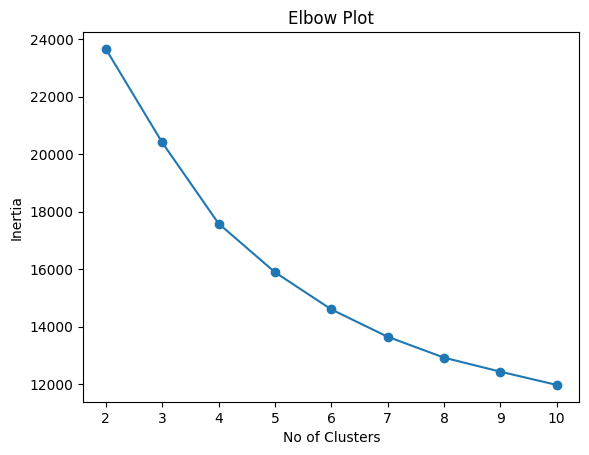

In [48]:
inertial_values = [] #sum of squared distances to the nearest centroid
k_values = range(2,11)

for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(scaled_df)
    inertial_values.append(kmeans.inertia_)

#plotiing the elbow plot
plt.plot(k_values, inertial_values, marker = 'o')
plt.title('Elbow Plot')
plt.xlabel('No of Clusters')
plt.ylabel('Inertia')
plt.show()

 k = 4
and 
 k = 5

Silhouette Score

In [49]:
from sklearn.metrics import silhouette_score

In [50]:
silhouette_scores = []
k_values = range(2,10)

for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(scaled_df)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(scaled_df, labels)
    silhouette_scores.append(silhouette_avg)
    print('For K = ', k , 'The Silhouette Score is ',silhouette_avg)
    
    optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print('==========================================================')
print('The Optimal number of cluster is : ',optimal_k)

For K =  2 The Silhouette Score is  0.578656044586165
For K =  3 The Silhouette Score is  0.19645462586486348
For K =  4 The Silhouette Score is  0.20398014921569257
For K =  5 The Silhouette Score is  0.17926288326833628
For K =  6 The Silhouette Score is  0.1732936500886249
For K =  7 The Silhouette Score is  0.16972647829568907
For K =  8 The Silhouette Score is  0.17023518053531175
For K =  9 The Silhouette Score is  0.16194142099512554
The Optimal number of cluster is :  2


# K = 4

In [51]:
k = 4
model = KMeans(n_clusters=k,random_state=10)
model.fit(scaled_df)

KMeans(n_clusters=4, random_state=10)

In [52]:
print("Cluster Labels : ",model.labels_)

Cluster Labels :  [0 2 3 ... 0 3 0]


In [53]:
df['cluster_idk4'] = model.labels_

In [54]:
df.head()

,song_id,artists,name,acousticness,danceability,duration_ms,energy,instrumentalness,loudness,popularity,tempo,valence,cluster_idk4
0,5C1TucCRf4Vjjree1OItyv,['Lewis Capaldi'],One,0.83400,0.708,179908,0.339,0.000000,-7.085,72,117.995,0.5120,0
1,2mGpfyZuvwQT7qimhly4S1,['Momento'],The Destination,0.94000,0.115,247500,0.109,0.951000,-23.219,67,76.163,0.0391,2
2,59tskctgqUmjCWAwhzYAFm,['Sabrina Carpenter'],Looking at Me,0.00398,0.681,181120,0.798,0.000005,-4.367,71,105.990,0.5160,3
3,5Id5B3dxJZhPcV9GzgYZZe,"['Rich Music LTD', 'Sech', 'Dalex', 'Justin Qu...",Quizas,0.02580,0.727,216067,0.815,0.000000,-2.454,81,176.075,0.6770,3
4,4rWC4tiO4NCwRHdh6vyu6b,['Juice WRLD'],Big,0.06280,0.768,224063,0.641,0.000000,-6.197,65,144.963,0.2310,0


In [55]:
#Write the results for making interpretaions
df.to_excel('Songs_Clusteredk4.xlsx',index=False)

In [56]:
# =============================================================================
# Profile Clusters K = 4
# =============================================================================
centroids=model.cluster_centers_
column_names= selected_columns_df.columns.tolist()
cluster_profile_df=pd.DataFrame(centroids,columns=column_names)
print(cluster_profile_df)

   acousticness  danceability  duration_ms    energy  instrumentalness  \
0      0.331257     -0.254477     0.291965 -0.392353         -0.213721   
1      0.016554     -0.168959     0.623962  0.412937         -0.180321   
2      2.070965     -2.346331    -0.288053 -2.332968          3.835584   
3     -0.421206      0.413788    -0.208558  0.449618         -0.239644   

   loudness  popularity     tempo   valence  
0 -0.043151    0.150315 -0.212362 -0.663137  
1  0.295137   -3.961249  0.064503  0.256147  
2 -3.522025   -0.032287 -0.903796 -1.521558  
3  0.360123    0.247899  0.220484  0.551535  


In [57]:
#Write to an excel file for reading this
cluster_profile_df.to_excel('Songs_Cluster_Profilek4.xlsx',index=True)

# K = 5

In [58]:
k = 5
model2 = KMeans(n_clusters=k,random_state=10)
model2.fit(scaled_df)

KMeans(n_clusters=5, random_state=10)

In [59]:
print("Cluster Labels : ",model2.labels_)

Cluster Labels :  [2 0 1 ... 2 3 3]


In [60]:
df['cluster_idk5'] = model2.labels_

In [61]:
df.head()

,song_id,artists,name,acousticness,danceability,duration_ms,energy,instrumentalness,loudness,popularity,tempo,valence,cluster_idk4,cluster_idk5
0,5C1TucCRf4Vjjree1OItyv,['Lewis Capaldi'],One,0.83400,0.708,179908,0.339,0.000000,-7.085,72,117.995,0.5120,0,2
1,2mGpfyZuvwQT7qimhly4S1,['Momento'],The Destination,0.94000,0.115,247500,0.109,0.951000,-23.219,67,76.163,0.0391,2,0
2,59tskctgqUmjCWAwhzYAFm,['Sabrina Carpenter'],Looking at Me,0.00398,0.681,181120,0.798,0.000005,-4.367,71,105.990,0.5160,3,1
3,5Id5B3dxJZhPcV9GzgYZZe,"['Rich Music LTD', 'Sech', 'Dalex', 'Justin Qu...",Quizas,0.02580,0.727,216067,0.815,0.000000,-2.454,81,176.075,0.6770,3,1
4,4rWC4tiO4NCwRHdh6vyu6b,['Juice WRLD'],Big,0.06280,0.768,224063,0.641,0.000000,-6.197,65,144.963,0.2310,0,3


In [62]:
#Write the results for making interpretaions
df.to_excel('Songs_Clusteredk5.xlsx',index=False)

In [63]:
# Profile Clusters for K = 5
# =============================================================================
centroids=model2.cluster_centers_
column_names= selected_columns_df.columns.tolist()
cluster_profile2_df=pd.DataFrame(centroids,columns=column_names)
print(cluster_profile2_df)

   acousticness  danceability  duration_ms    energy  instrumentalness  \
0      2.067458     -2.369642    -0.297798 -2.337583          3.868058   
1     -0.325891      0.548688    -0.296407  0.390590         -0.247914   
2      1.323871     -0.334803     0.124792 -0.913560         -0.191468   
3     -0.504969     -0.103567     0.258695  0.242760         -0.219845   
4      0.010955     -0.165081     0.614743  0.399674         -0.181399   

   loudness  popularity     tempo   valence  
0 -3.545498   -0.044240 -0.913709 -1.526358  
1  0.340527    0.262451  0.063787  0.852990  
2 -0.285465    0.182850 -0.362893 -0.463108  
3  0.245298    0.165066  0.215990 -0.598820  
4  0.289056   -3.940971  0.053540  0.248153  


In [64]:
#Write to an excel file for reading this
cluster_profile2_df.to_excel('Songs_Cluster_Profilek5.xlsx',index=True)